<a href="https://colab.research.google.com/github/YATABARE-Cheikna-Amala/Algorithme_de_Machine_Learning/blob/main/NLPipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiments Analysis**

## Read in data and NLTK Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [ ]:
# read in data

df  = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df.shape

(568454, 10)

# EDA

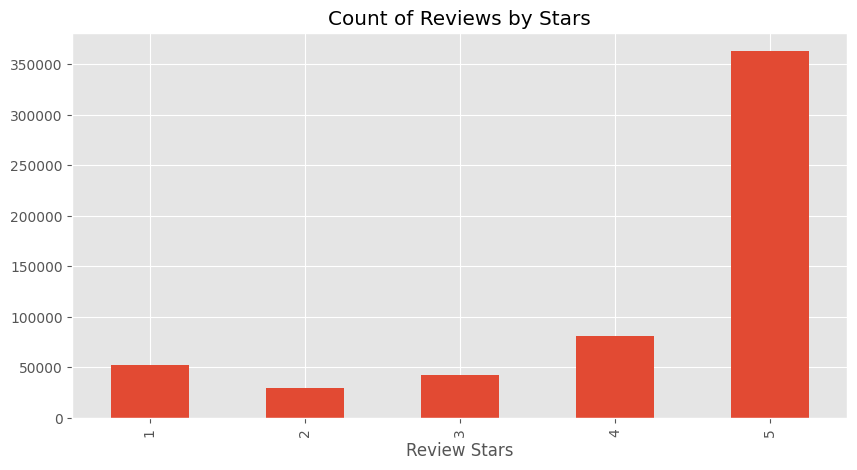

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title='Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [ ]:
example = df['Text'][2]
print(example)

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


## Tokenisation:
Nous allons utiliser chaque mot de cette phrase comme etant un element dans l'espace.

In [ ]:
token = nltk.word_tokenize(example)
token[:10]

['This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few']

We affect that at each of part of token a caracteristic refers to grammatical sens

- NN :  Nouns
- VB/VBP : Verb
- JJ : adjectif
- RB : adverbe
- DT :  Determinant

In [ ]:
tagged = nltk.pos_tag(token)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('confection', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('around', 'IN'),
 ('a', 'DT'),
 ('few', 'JJ')]

We use now chunk_ne_chunk
Classes and interfaces for identifying non-overlapping linguistic
groups (such as base noun phrases) in unrestricted text.  This task is
called "chunk parsing" or "chunking", and the identified groups are
called "chunks".  The chunked text is represented using a shallow
tree called a "chunk structure."  A chunk structure is a tree
containing tokens and chunks, where each chunk is a subtree containing
only tokens.  For example, the chunk structure for base noun phrase
chunks in the sentence "I saw the big dog on the hill" is::


In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  confection/NN
  that/WDT
  has/VBZ
  been/VBN
  around/IN
  a/DT
  few/JJ
  centuries/NNS
  ./.
  It/PRP
  is/VBZ
  a/DT
  light/JJ
  ,/,
  pillowy/JJ
  citrus/NN
  gelatin/NN
  with/IN
  nuts/NNS
  -/:
  in/IN
  this/DT
  case/NN
  Filberts/NNP
  ./.
  And/CC
  it/PRP
  is/VBZ
  cut/VBN
  into/IN
  tiny/JJ
  squares/NNS
  and/CC
  then/RB
  liberally/RB
  coated/VBN
  with/IN
  powdered/JJ
  sugar/NN
  ./.
  And/CC
  it/PRP
  is/VBZ
  a/DT
  tiny/JJ
  mouthful/NN
  of/IN
  heaven/NN
  ./.
  Not/RB
  too/RB
  chewy/JJ
  ,/,
  and/CC
  very/RB
  flavorful/JJ
  ./.
  I/PRP
  highly/RB
  recommend/VBP
  this/DT
  yummy/JJ
  treat/NN
  ./.
  If/IN
  you/PRP
  are/VBP
  familiar/JJ
  with/IN
  the/DT
  story/NN
  of/IN
  C.S/NNP
  ./.
  (PERSON Lewis/NNP)
  '/POS
  ``/``
  The/DT
  (ORGANIZATION Lion/NNP)
  ,/,
  The/DT
  (GPE Witch/NNP)
  ,/,
  and/CC
  The/DT
  (ORGANIZATION Wardrobe/NNP)
  ''/''
  -/:
  this/DT
  is/VBZ
  the/DT
  treat/NN
  that/WDT
  sedu

## Step 1. VADER Sentiment Scoring

we can use sia that is efficient to analyze text and their sentiment


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

Here we see compound is positive, it means that the phrasal is positive.

In [ ]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

we see that in the phrasal above, the sentence is negative so it is a reason that a compound is negative.

Now we can run Vader on the entire dataset

In [ ]:
# if you don't Know how to use tqdm, it is no difficult, it is so fun:
import time
from tqdm.notebook import tqdm
for i in tqdm(range(10)):
  time.sleep(0.01)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
keys = list(res.keys())[:100]
values = list(res.values())[:100]

for k,v in zip(keys, values):
  print(k, ':', v)


1 : {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
2 : {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
3 : {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
4 : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
5 : {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
6 : {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
7 : {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
8 : {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
9 : {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
10 : {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}
11 : {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}
12 : {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}
13 : {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}
14 : {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}
15 : {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}
16 : {'neg': 0.0

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how = 'left')

In [ ]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# We have now sentiment score with metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER result

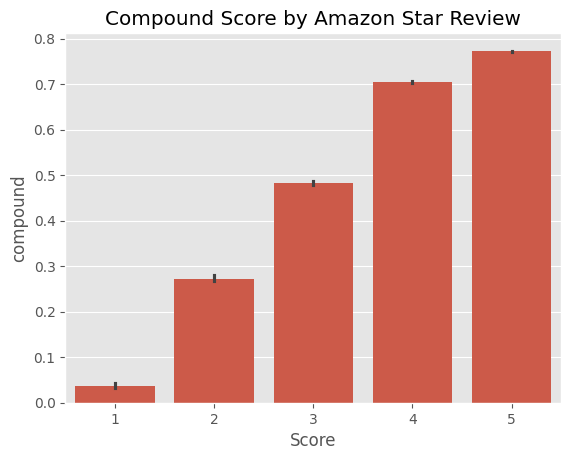

In [ ]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

# Show negative and Positive compound

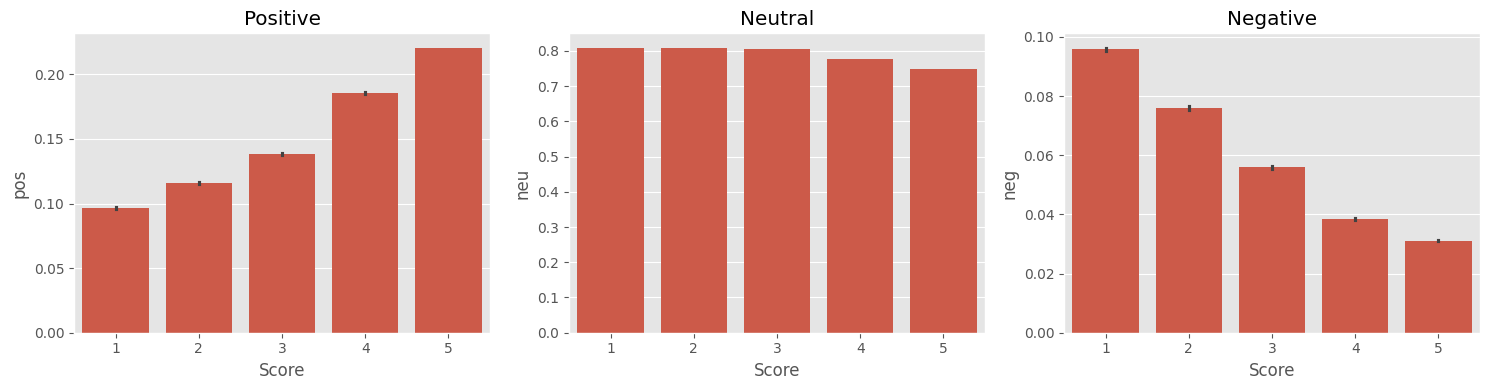

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

# titres pour chaque subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


# Step 3: Roberta Pretrained Model

- use a model trained of a large corpus of data
- Transformer model account for the words but also the context related to other related to other words

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Now we use a model provides by HugginFace.


In [ ]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

We use Roberta developped by Huggain Face and utilise py torch models

In [ ]:
encoder_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoder_text)
score = output[0][0].detach().numpy()
score = softmax(score)
score_dict = {
    'roberta_neg' : score[0],
    'roberta_neu' : score[1],
    'roberta_pos' : score[2]
}
print(score_dict)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

{'roberta_neg': np.float32(0.0032289051), 'roberta_neu': np.float32(0.09806727), 'roberta_pos': np.float32(0.89870375)}


we apply that on entire dataset

In [ ]:
# create a function with roberta

def polarty_score_roberta(example):
  encoded_text = tokenizer(example,return_tensors = 'pt')
  output = model(**encoder_text)
  score = output[0][0].detach().numpy()
  score = softmax(score)
  score_dict = {
    'roberta_neg' : score[0],
    'roberta_neu' : score[1],
    'roberta_pos' : score[2]
  }
  return score_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)

    roberta_result = polarty_score_roberta(text)
    both = {**vader_result, **roberta_result}
    res[myid] = both

  except RuntimeError:
    print(f'Broke for id {myid}')


  0%|          | 0/568454 [00:00<?, ?it/s]